# Import Necessary Packages

In [37]:
import numpy as np 
import pandas as pd

import os


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.utils import shuffle
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

# Data Collection and Preprocessing

In [38]:
letters = pd.read_csv("data/letters.csv")
letters2 = pd.read_csv("data/letters2.csv")
letters3 = pd.read_csv("data/letters3.csv")


In [39]:
source = pd.Series([])

letters["source"] = source
letters2["source"] = source
letters3["source"] = source
for i in range(len(letters)): 
    letters["source"][i] = "/letters"

for i in range(len(letters2)): 
    letters2["source"][i] = "/letters2"
    
for i in range(len(letters3)):
    letters3["source"][i] = "/letters3"


<ipython-input-39-6aa89907d61f>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  source = pd.Series([])
<ipython-input-39-6aa89907d61f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  letters["source"][i] = "/letters"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-39-6aa89907d61f>:10: SettingWithCopyWarning: 
A value is trying to 

In [40]:
data = pd.concat((letters, letters2, letters3), axis = 0, ignore_index = True)

In [41]:
data.shape

(14190, 5)

In [42]:
data.head()

,letter,label,file,background,source
0,а,1,01_01.png,0,/letters
1,а,1,01_02.png,0,/letters
2,а,1,01_03.png,0,/letters
3,а,1,01_04.png,0,/letters
4,а,1,01_05.png,0,/letters


In [43]:
data.tail()

,letter,label,file,background,source
14185,я,33,33_426.png,3,/letters3
14186,я,33,33_427.png,3,/letters3
14187,я,33,33_428.png,3,/letters3
14188,я,33,33_429.png,3,/letters3
14189,я,33,33_430.png,3,/letters3


In [44]:
data = shuffle(data, random_state = 42).reset_index(drop = True)

In [45]:
data.head()

,letter,label,file,background,source
0,щ,27,27_212.png,2,/letters2
1,в,3,03_53.png,2,/letters2
2,ы,29,29_336.png,3,/letters3
3,с,19,19_311.png,3,/letters3
4,щ,27,27_278.png,3,/letters3


In [46]:
data.tail()

,letter,label,file,background,source
14185,т,20,20_172.png,2,/letters2
14186,ь,30,30_259.png,3,/letters3
14187,у,21,21_191.png,2,/letters2
14188,р,18,18_11.png,0,/letters
14189,ю,32,32_91.png,2,/letters2


In [47]:
dirname = "data"
imgs = []
for i in range(len(data)):
    imgs.append(load_img(os.path.join(dirname + data["source"][i], data["file"][i]), target_size = (32, 32)))

In [48]:
imgs_array = np.array([img_to_array(img) for img in imgs])/255

In [49]:
imgs_array.shape

(14190, 32, 32, 3)

Both the letter and the background are considered as labels.

Targets is a list of 2 element lists where the first element is the letter and the second is the background. 

In [50]:
targets = []
for i, row in data.iterrows(): 
    t = [data.letter[i], data.background[i]]
    targets.append(t)

In [51]:
targets_array = np.array(targets)

Scikit-learn library's MultiLabelBinarizer allows to one-hot encode features with multiple labels.

In [52]:
X_train, X_val, y_train, y_val = train_test_split(imgs_array, targets_array, 
                                                test_size=0.2,  
                                                random_state=42)

In [53]:
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_val = mlb.transform(y_val)

In [54]:
for (i, target) in enumerate(mlb.classes_):
    print("{}. {}".format(i + 1, target))

1. 0
2. 1
3. 2
4. 3
5. а
6. б
7. в
8. г
9. д
10. е
11. ж
12. з
13. и
14. й
15. к
16. л
17. м
18. н
19. о
20. п
21. р
22. с
23. т
24. у
25. ф
26. х
27. ц
28. ч
29. ш
30. щ
31. ъ
32. ы
33. ь
34. э
35. ю
36. я
37. ё


There are 33 distinct letters and 4 different backgrounds. 

Backrground Labels: 
* 0 => striped
* 1 => gridded
* 2 => no background
* 3 => graph paper

In [55]:
def display_image(images, list_of_labels = np.arange(15)): 
    plt.figure(figsize=(12,12))
    for i in list_of_labels: 
        plt.subplot(3, 5, i+1)
        plt.title('Letter: %s \n'%targets[i][0]+\
                    'Background: %s\n'%targets[i][1],
                         fontsize=18)
        plt.imshow(images[i])
        
    plt.subplots_adjust(bottom = 0.001)
    plt.subplots_adjust(top = 0.99)
    plt.show()
   

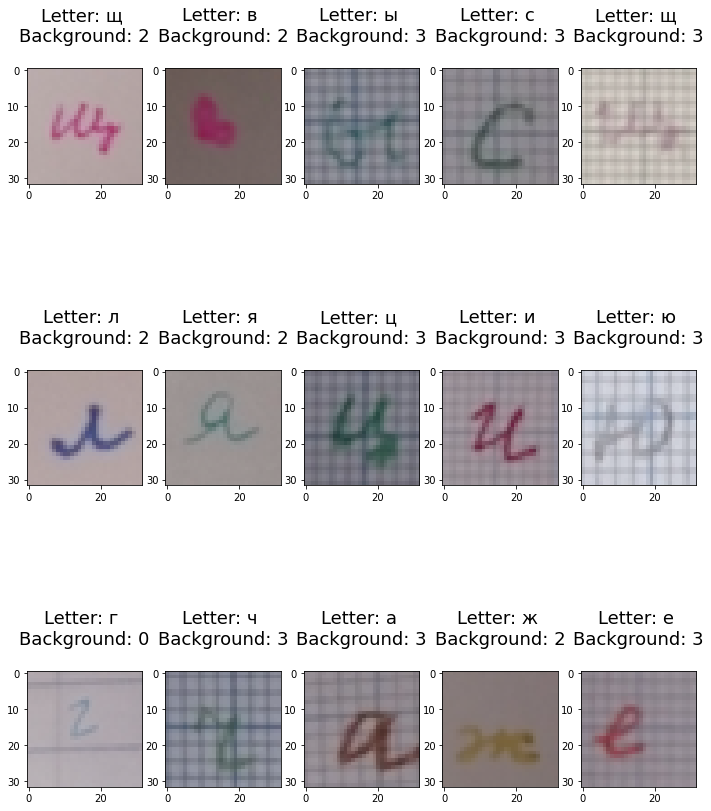

In [56]:
display_image(imgs_array)

In [57]:
print("shape of X_train: {} \nshape of X_val: {} \nshape of y_train: {} \nshape of y_val: {}".format(
    X_train.shape, X_val.shape, y_train.shape, y_val.shape))

shape of X_train: (11352, 32, 32, 3) 
shape of X_val: (2838, 32, 32, 3) 
shape of y_train: (11352, 37) 
shape of y_val: (2838, 37)


# The CNN Model

In [58]:
img_rows = 32
img_cols = 32
channels = 3
classes = len(mlb.classes_)

model = Sequential()

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'Same',
                     activation = 'relu',
                     input_shape = (img_rows, img_cols, channels)))
model.add(BatchNormalization(axis=-1))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), padding = 'Same', activation = 'relu'))
#model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding = 'Same', activation = 'relu'))
#model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), padding = 'Same', activation = 'relu'))
#model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(classes, activation='sigmoid'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

In [59]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
aug = ImageDataGenerator(
        rotation_range=5, 
        zoom_range = 0.2, 
        width_shift_range=0.2,  
        height_shift_range=0.2 
        )

In [61]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

In [62]:
BS = 32
EPOCHS = 100
history = model.fit(x=aug.flow(X_train, y_train, batch_size = BS),
                    steps_per_epoch = len(X_train)//BS,   
                    epochs = EPOCHS,
                    verbose = 1,
                    validation_data = (X_val, y_val), callbacks=[early_stop])

Epoch 1/100
354/354 [==============================] - 109s 305ms/step - loss: 0.1714 - accuracy: 0.7450 - val_loss: 0.2623 - val_accuracy: 0.8576

# Model Evaluation

In [63]:
loss_accuracy = pd.DataFrame(model.history.history)

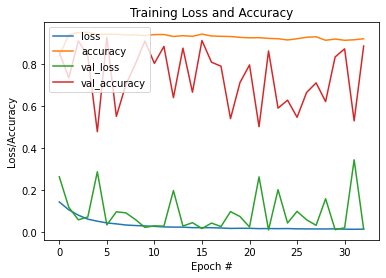

In [64]:
loss_accuracy.plot()
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [65]:
predictions = model.predict(X_val)

In [66]:
predictions[predictions>0.5] = 1
predictions[predictions<=0.5] = 0

In [67]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       136
           1       1.00      0.97      0.99       181
           2       1.00      1.00      1.00      1172
           3       1.00      1.00      1.00      1349
           4       0.94      0.87      0.90        76
           5       1.00      0.97      0.98        90
           6       0.99      0.87      0.92        83
           7       0.98      0.91      0.94        93
           8       1.00      0.95      0.97        75
           9       0.95      0.76      0.85        80
          10       0.96      0.95      0.96        85
          11       0.99      0.96      0.97        91
          12       0.77      0.74      0.75        91
          13       1.00      0.95      0.97        75
          14       0.96      0.92      0.94        85
          15       1.00      0.88      0.94        86
          16       0.94      0.93      0.94        91
          17       0.96    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
pred_results = mlb.inverse_transform(predictions)
true_results = mlb.inverse_transform(y_val)

In [69]:
correct = 0 
total = 0 
for i in range(len(y_val)):
    if pred_results[i] == true_results[i]:
        correct += 1
        
    total += 1 
    
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.884


In [70]:
def display_predicted_image(images, list_of_labels = np.arange(15)): 
    plt.figure(figsize=(12,12))
    for i in list_of_labels:
        if len(pred_results[i]) != 2:
            print("Sorry, prediction {} has the wrong size, WRONG PREDICTION".format(i+1))
        else:
            plt.subplot(3, 5, i+1)
            plt.title('Prediction %s \n'%(i+1)+\
                        'True Letter: %s \n'%true_results[i][1]+\
                            'True Background: %s\n'%true_results[i][0]+\
                                'Predicted Letter: %s \n'%pred_results[i][1]+\
                                  'Predicted Background: %s \n'%pred_results[i][0],
                                     fontsize=18)
        
            plt.imshow(images[i])
        
    plt.subplots_adjust(bottom = 0.005)
    plt.subplots_adjust(top = 1.5)
    plt.subplots_adjust(left = 0.125)
    plt.subplots_adjust(right = 1.5)
    plt.show()

Sorry, prediction 2 has the wrong size, WRONG PREDICTION
Sorry, prediction 9 has the wrong size, WRONG PREDICTION


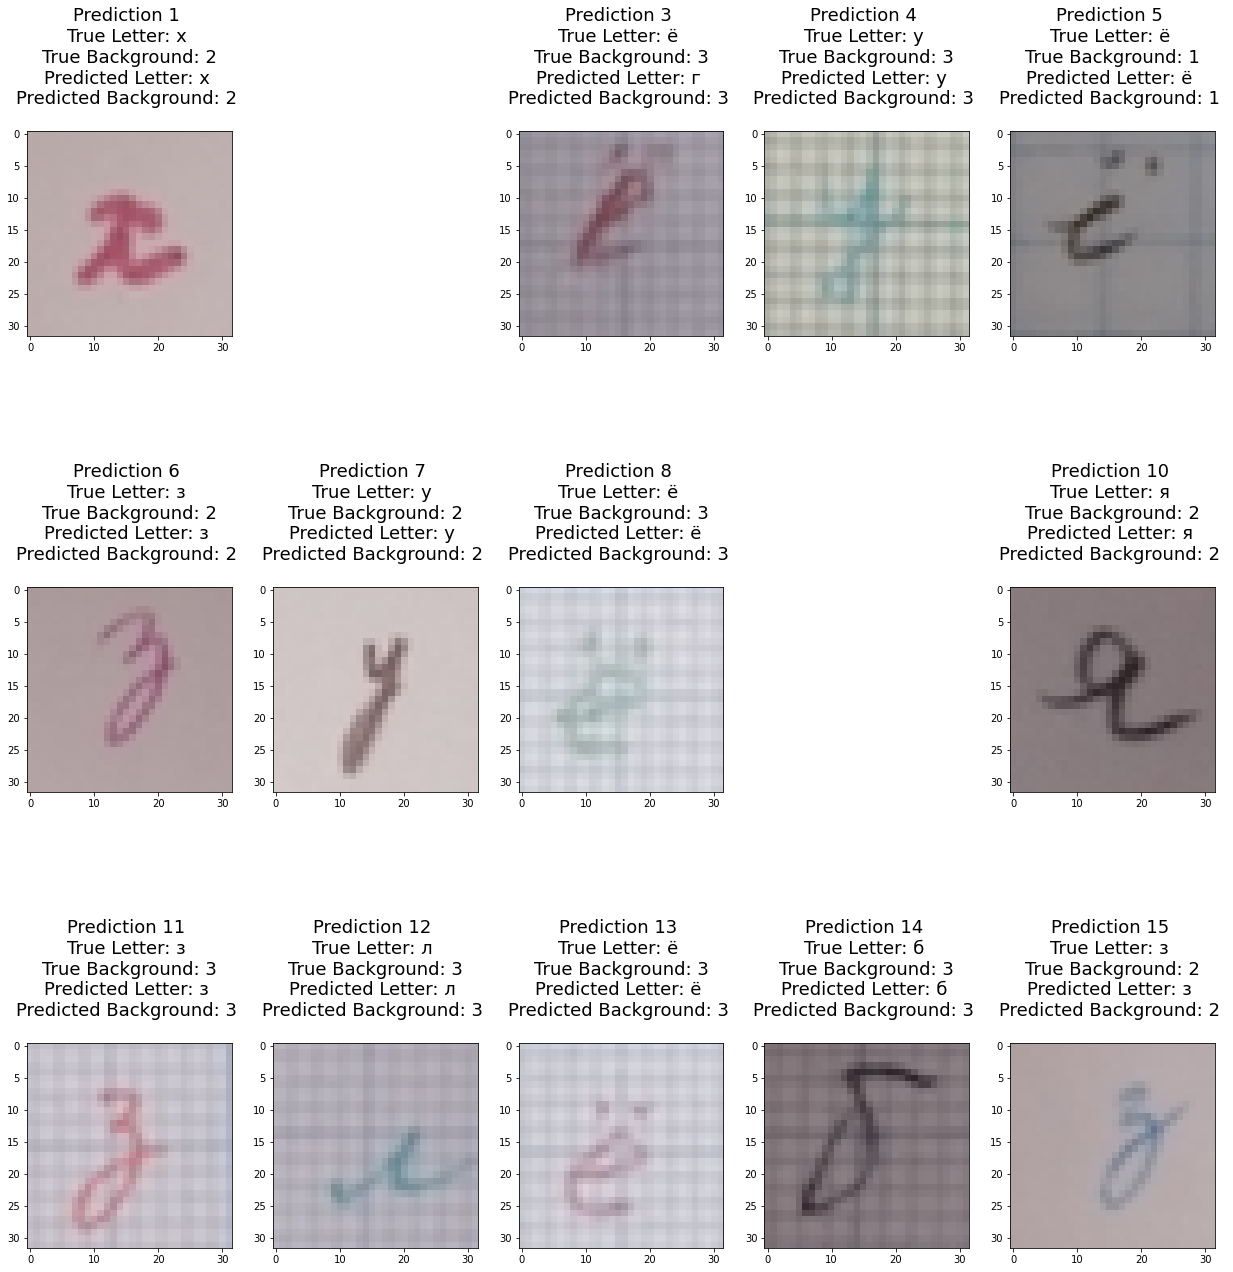

In [71]:
display_predicted_image(X_val, list_of_labels = np.arange(15))

# Saving the model

In [72]:
model.save("handwritten_classification_model.h5")
print("Saved model to disk")

Saved model to disk
